<a href="https://colab.research.google.com/github/Sanghita-C/Automatic-Vehicles---Lane-Change-Mechanism/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression From Scratch

##Math Fundamentatls:

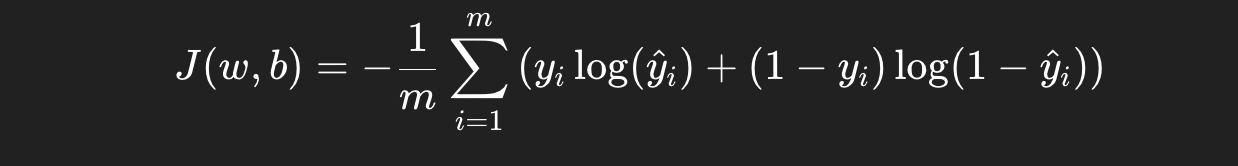

Yhat over here is the sigmoid equivalent:


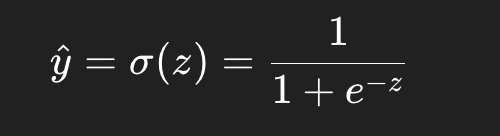


You can do the gradient calculation by chain rule, but the final gradients look like:

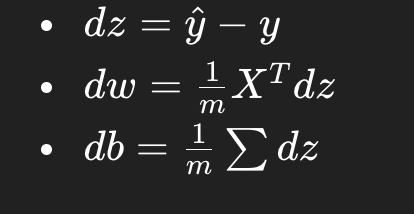

If you do the exercise for deriving the gradients, I will attach the detailed steps at the end :)



In [3]:
import numpy as np

In [11]:
#utitlity functions

def gradient_descent(X,y,w_init,b,lr,n_iters, verbose = False):
  w = w_init.copy()
  b =float(b)

  for i in range(n_iters):

    loss, dw, db = compute_gradient(X,y,w,b)

    w= w - lr*dw
    b = b - lr*db

    if verbose and i%100 ==0:
      print( f"loss: {loss:.4f}")

  return w,b


def compute_gradient(X,y,w, b):

  y_hat = sigmoid(X@w +b)
  n = X.shape[0]
  loss = - (1/n) * (np.dot(y.T,np.log(y_hat)) + np.dot((1-y).T,np.log(1-y_hat)))

  dw = (1/n)* X.T @(y_hat - y)
  db = (1/n)* np.sum(y_hat -y)

  return loss,dw,db

def sigmoid(z):
  return 1/(1+np.exp(-z))




In [12]:
class LogisticRegression:
  def __init__(self,lr,n_iters,verbose= False):
    self.w = None
    self.b = None
    self.lr = lr
    self.n_iters = n_iters
    self.verbose = verbose

  def fit(self,X,y):
    X= np.asarray(X)
    y = np.array(y)

    if X.ndim ==1:
      X = X.reshape(-1,1)

    y = y.reshape(-1)

    n,d = X.shape

    self.w = np.zeros(d)
    self.b = 0.0

    self.w, self.b = gradient_descent(X,y,self.w,self.b,self.lr,self.n_iters,self.verbose)

    return self



  def predict(self,X):
    X = np.asarray(X)
    if X.ndim ==1:
      X = X.reshape(-1,1)

    y_hat = sigmoid(X@self.w +self.b)

    if y_hat > 0.6:
      return 1
    else:
      return 0


In [13]:
np.random.seed(0)
m = 300
X = np.random.randn(m, 2)
true_w = np.array([2.0, -1.0])
true_b = -0.2

logits = X @ true_w + true_b
probs = 1 / (1 + np.exp(-logits))
y = (probs > 0.5).astype(int)

model = LogisticRegression(lr=0.2, n_iters=2000, verbose=True)
model.fit(X, y)

print("w:", model.w, "b:", model.b)

loss: 0.6931
loss: 0.2172
loss: 0.1674
loss: 0.1439
loss: 0.1294
loss: 0.1193
loss: 0.1116
loss: 0.1055
loss: 0.1006
loss: 0.0964
loss: 0.0928
loss: 0.0897
loss: 0.0869
loss: 0.0844
loss: 0.0822
loss: 0.0802
loss: 0.0784
loss: 0.0767
loss: 0.0751
loss: 0.0737
w: [ 8.01285351 -3.87805585] b: -0.9191800764472716
